# 7. 비지도 학습

PCA(Principal Component Analysis) : 주성분 분석

-차원 축소 기법 중 대표적인 기법

-고차원에서 저차원으로 축소하는 선형 투형 기법

-데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커짐

ex)100개의 차원도 2개의 차원으로 줄일 수 있음

PCA 단계

-데이터 분산이 최대인 축을 찾음(첫번째 축)

-첫번째 축과 직교하면서 분산이 최대인 축을 찾음(두번째 축)

-첫번째와 두번째 축에 직교하고, 분산이 최대인 축을 찾음(세번째 축)

![](./bi_02.png)

https://www.youtube.com/watch?v=YEdscCNsinU

PCA 전단계

In [295]:
#라이브러리 불러오기
import pandas as pd

In [296]:
#와인데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [297]:
#데이터 확인하기
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [298]:
data.shape

(178, 13)

In [299]:
#스케일링
#스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [300]:
#데이터 복사(df변수)
df = data.copy()

PCA

In [301]:
#PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [302]:
#PCA 적용
pca = PCA(n_components=2)

In [303]:
#PCA 변환
df = pca.fit_transform(df)

In [304]:
#PCA 변환된 데이터 확인
df.shape

(178, 2)

In [305]:
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

PCA 2차원 시각화

In [306]:
#시각화 라이브러리
import matplotlib.pyplot as plt

In [307]:
#데이터 프레임 변환
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
df.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


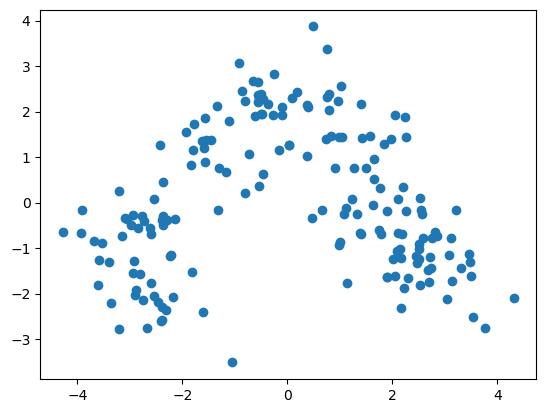

In [308]:
#scatter plot
plt.scatter(df['PC1'], df['PC2'])
#plt.scatter(df.iloc[:, 0], df.iloc[:, 1]) 같은 코드

In [309]:
#전부다 파란색 점으로 나와서 타겟 구분이 안된다
#타겟 확인
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

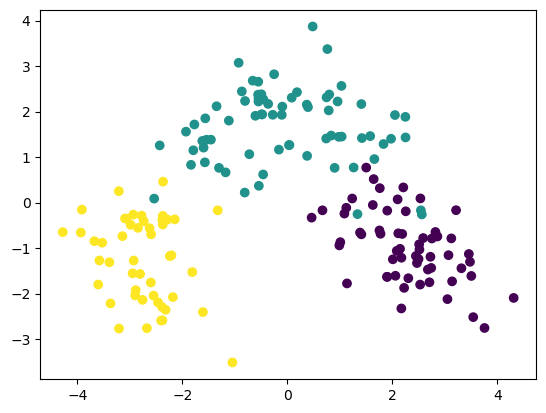

In [310]:
#타겟 컬러 속성 추가
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

In [311]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
# 첫번째 데이터가 36% 두번째 데이터가 19% 정도의 설명력을 가짐

[0.36198848 0.1920749 ]


In [312]:
# 두가지를 합쳤을때 55%의 설명력을 가짐
print(pca.explained_variance_ratio_.sum())

0.5540633835693534


지도학습( PCA 전후 비교)

In [313]:
#PCA 후 데이터로 머신러닝(2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state = 2002)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()

0.9493650793650794

In [314]:
#PCA 전 데이터로 머신러닝(13)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()


0.9777777777777779

PCA (3차원) 시각화

In [315]:
# 새 데이터 복사
df = data.copy()

In [316]:
# PCA (3차원) 적용
pca = PCA(n_components=3)

In [317]:
# PCA 변환
df = pca.fit_transform(df)

In [318]:
# 데이터 프레임 변환
df = pd.DataFrame(df)

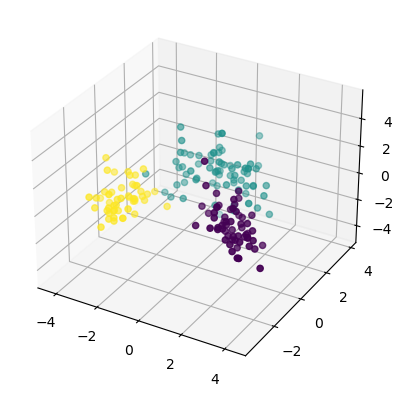

In [319]:
# 3차원 시각화
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0],df.iloc[:,1], df.iloc[:,2],c=dataset.target)

점진적 PCA
-데이터 셋이 큰 경우 활용(배치를 통해 점진적 수행)

In [320]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [321]:
# 데이터 복사
df = data.copy()

In [322]:
# 점진적 PCA 적용
pca = IncrementalPCA(n_components=2)

In [323]:
# 점진적 PCA 변환
df = pca.fit_transform(df)

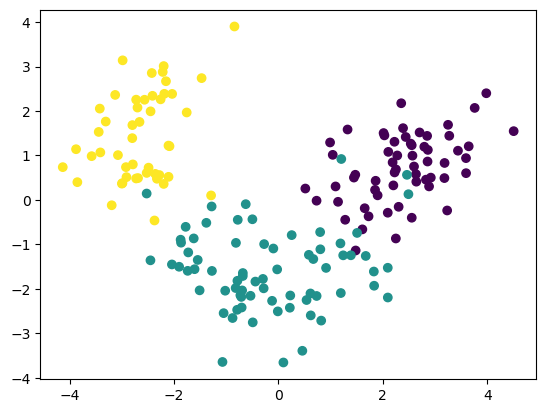

In [324]:
# 시각화
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

In [325]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)

[0.34777547 0.17419062]


In [326]:
# 두가지를 합쳤을때 55%의 설명력을 가짐
print(pca.explained_variance_ratio_.sum())

0.521966091973267


희소 PCA
-적절한 희소성을 유지(alpha 값으로 조정)
-오버피팅 방지

In [327]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [328]:
# 데이터 복사
df = data.copy()

In [329]:
# 희소 PCA 적용
pca = SparsePCA(n_components=2, alpha=0.0001)

In [330]:
# 희소 PCA 변환
df = pca.fit_transform(df)

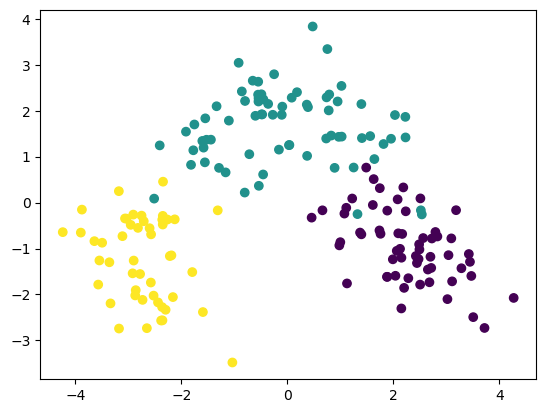

In [331]:
# 시각화
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

커널PCA
-비선형으로 차원축수

In [332]:
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA

In [333]:
# 데이터 복사
df = data.copy()

In [334]:
# 커널 PCA 적용
pca = KernelPCA(n_components=2)

In [335]:
# 커널 PCA 변환
df = pca.fit_transform(df)


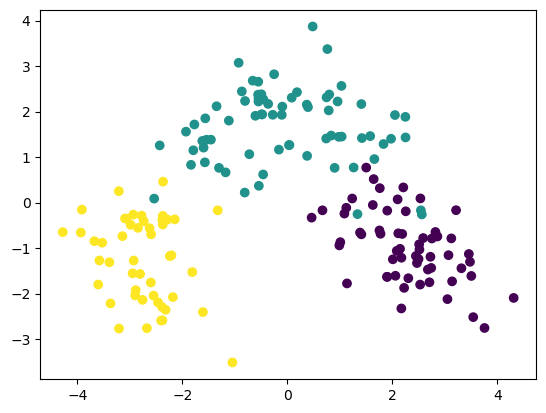

In [336]:
# 시각화
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

SVD (Singular Value Decomposition) 특이값 분해
-행렬을 특정한 구조로 분해하는 방식
-신호 처리와 통계학 등의 분야에서 자주 사용됨

In [337]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [338]:
# 데이터 복사
df = data.copy()

In [339]:
# SVD 적용
svd = TruncatedSVD(n_components=2)

In [340]:
# SVD 변환
df = svd.fit_transform(df)

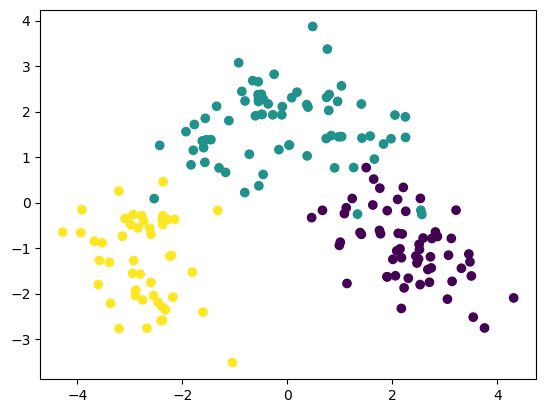

In [341]:
# 시각화
df = pd.DataFrame(df, columns=['PC1', 'PC2'])
plt.scatter(df['PC1'], df['PC2'], c=dataset.target)

## 군집(클러스터링)

-군집분석은 유사성이 높은 대상의 집단을 분류하는 분석방법

-계층적 군집분석과 비계층적 군집분석으로 구분

  -> 전통적인 계층적 군집분석은 군집의 개수를 나중에 선정함

  -> 덴드로그램(Dendrogram)은 계층적 군집 분석에서 사용되는 트리 형태의 시각화 도구입니다.

  이는 군집 간의 거리(또는 유사성)를 나타낼 때 도움이 됩니다. 덴드로그램은 각 데이터 포인트를 개별 군집으로 시작하고 차례대로 군집을 병합하거나 나누면서 구성됩니다. 덴드로그램의 주요 구성 요소는 다음과 같습니다

  잎(Leaf) : 각 데이터 포인트를 나타내는 가장 하위 수준의 요소.

  가지(Branch) : 데이터 포인트 또는 군집들을 연결하는 덴드로그램의 각 구성 요소.

  연결(Link) : 두 개의 가지가 만나는 지점으로, 해당 두 군집 간의 거리(또는 유사성)를 나타냅니다.

  덴드로그램은 다음과 같은 방법으로 해석됩니다:
  덴드로그램의 가로축은 각 데이터 포인트를 나타냅니다. 세로축은 거리 또는 유사성 메트릭을 나타냅니다.

  데이터 포인트들이 병합되면서 덴드로그램에서 상향 방향으로 이동합니다. 유사성이 낮은 군집은 세로축에서 더 높은 위치에서 결합됩니다.

  덴드로그램을 사용하여 적절한 클러스터 수를 결정할 수도 있습니다. 이를 위해 덴드로그램에서 수평선을 그리면 원하는 클러스터의 수를 얻을 수 있습니다. 이 수평선은 일정한 거리에서 가장 많은 분기점들을 가로 질러야 합니다. 이 방법은 군집화에서 효과적인 클러스터 수를 찾는 데 도움이 됩니다.

  -> 비계층적 군집분석인 K-mean는 군집의 수를 가장 먼저 선정함

  -> K-mean 군집분석은 초기 중심값은 임의로 선정하며, 중심값이 이동함

-군집분석의 평가지표

  -> 실루엣 계수(silhouette coefficient) : 군집의 밀집도를 계산하여 군집의 품질을 평가하는 지표
  -> 실루엣 계수는 -1 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋은 군집화를 나타냄

  -> 실루엣 계수가 0에 가까울수록 중첩되는 데이터가 많음

  -> 실루엣 계수가 음수일 경우 잘못된 군집화를 의미함

  -> 실루엣 계수가 0.5 이상이면 군집화가 잘 된 것으로 판단함

  -> Dunn Index : 군집 내의 거리가 가깝고, 군집 간의 거리가 멀수록 군집화가 잘 된 것으로 판단함

  -> Davies Bouldin Index : 군집 간의 거리가 가깝고, 군집 내의 거리가 멀수록 군집화가 잘 된 것으로 판단함

  -> Calinski Harabasz Index : 군집 간의 분산이 크고, 군집 내의 분산이 작을수록 군집화가 잘 된 것으로 판단함

![](./bi_03.png)
![](./bi_04.png)

In [342]:
# 비계층적 군집분석
# K-평균군집(cenroid) : 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
# n-clusters : 군집의 개수 하이퍼 파라미터 반드시 설정
# n_init : 초기 중심값을 몇 번 선택할 것인지 설정


# KMeans 라이브러리
from sklearn.cluster import KMeans

In [343]:
# 데이터 불러오기
from sklearn.datasets import load_wine
import pandas as pd
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [344]:
# KMeans 선언 및 학습
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10)

In [345]:
#KMeans 예측
pred = kmeans.predict(df)

In [346]:
# 실제값과 예측값 비교
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


PCA(차원축소) -> 군집 -> 시각화

In [347]:
#PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df, columns=['pca1', 'pca2'])
df.head()

,pca1,pca2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [348]:
#KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pca1,pca2,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,0
174,3.131605,2.335191,0
175,88.458074,18.776285,0
176,93.456242,18.670819,0


In [349]:
#각 군집의 중심점
centers = kmeans.cluster_centers_

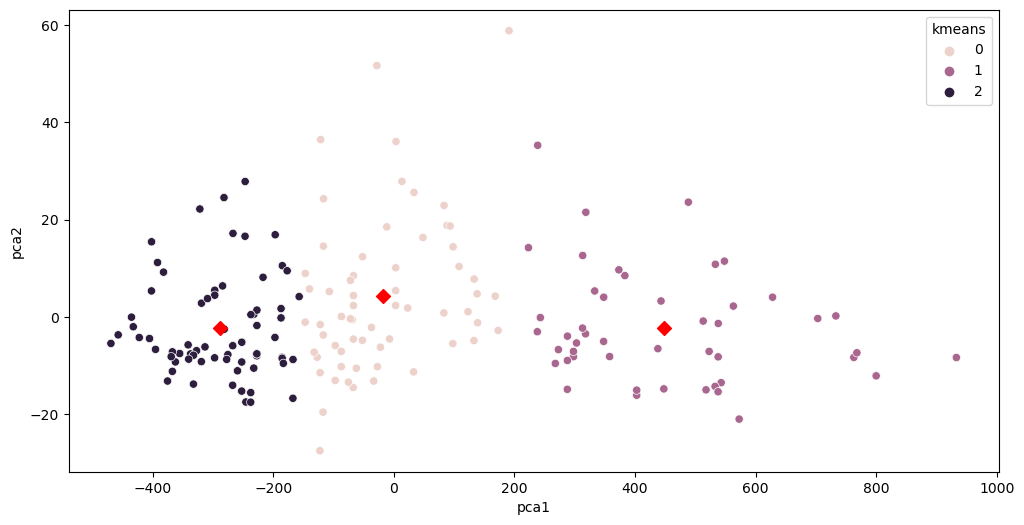

In [350]:
#시각화
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:,0], centers[:,1], s=50, marker='D', c='r')

클러스터 개수 찾는 방법(엘보우 방법,elbow method)

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

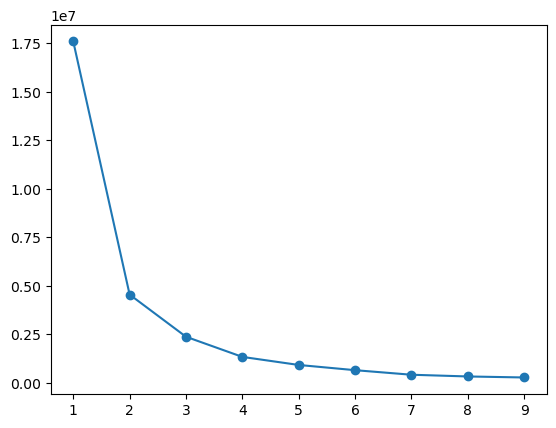

In [351]:
# 군집 수 찾기
# inertia : 군집 내 데이터와 중심점간의 거리의 합
# 군집 수가 증가할수록 inertia는 감소
# inertia가 급격히 감소하는 지점이 최적의 군집 수
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')

계층적 군집분석

- k-means와 달리 군집 개수를 사전에 설정하지 않음

- 덴드로그램

In [352]:
#덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward
#PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df, columns=['pca1', 'pca2'])
df.head()


,pca1,pca2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [358]:
#샘플링
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
dataset.target[:3]

/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_8715/2449541701.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kdata = kdata.append(df[70:73])
/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_8715/2449541701.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kdata = kdata.append(df[160:163])


array([0, 0, 0])

In [359]:
#검증
kdata

,pca1,pca2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.99151241147141, 30.99151241147141, 0.0],
  [0.0, 147.877877959848, 147.877877959848, 30.99151241147141],
  [0.0, 48.0273785221509, 48.0273785221509, 0.0],
  [0.0, 88.07194000276088, 88.07194000276088, 48.0273785221509],
  [0.0, 135.87135248973365, 135.87135248973365, 88.07194000276088],
  [0.0, 190.03011431770972, 190.03011431770972, 0.0],
  [135.87135248973365,
   461.0158736911474,
   461.0158736911474,
   190.03011431770972],
  [147.877877959848,
   1026.3965443828533,
   1026.3965443828533,
   461.0158736911474]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2

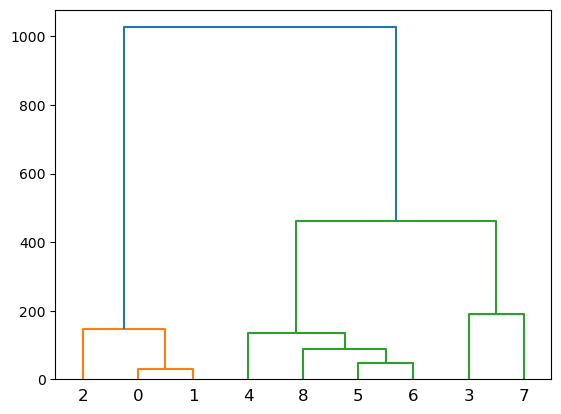

In [360]:
#덴드로그램
linkage = ward(kdata)
dendrogram(linkage)

파란색 선까지 자르면 C2, 파란색 선 1개와 녹색선 2개까지 C3 그아래로 내려가면 수많은 클러스터가 생성된다.

위에서 3개 군집 기준으로 묶었을때 0,1,2 가 0번 군집, 3,4,5가 1번 군집 6,7,8이 2번 군집이라 보고 결과를 확인 시 3번은 1번 군집이 아닌 2번 군집으로 6,8번은 2번 군집이 아닌 1번 군집으로 수정된것을 확인 할 수 있다. 0번은 군집이 잘 된 것으로 판단할 수 있다.


In [361]:
# 실습문제
# Q. 아래 코드를 실행하면 영상처럼 wine 데이터에 target 컬럼과 pred 컬럼이 생깁니다.
# 이때 영상에서 설명한 바와 같이 target의 0,1,2 값 각각이 의미하는 실제 wine의 종류와
# pred의 0,1,2 값 각각이 의미하는 실제 wine의 종류는 매칭이 안될 수 있습니다.
# 그렇다면 target의 0은 pred의 어떤 숫자와 매칭이 되어야할까요?
# 가정 : 가장 많이 겹치는 값이 매칭된다고 가정합니다.
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)

df['target'] = dataset.target
df['pred'] = pred

# target, pred 간의 상관관계 파악
cross_table = pd.crosstab(df['target'], df['pred'])

# 매칭되는 pred 값을 찾기
target_zero_matching = cross_table.iloc[0].idxmax()

# Q. target의 0은 pred의 어떤 숫자와 매칭이 되어야 할까요?
# target 0에 대한 pred 값의 매칭을 확인합니다.
print(f"Target 0은 Pred의 {target_zero_matching}와 매칭됩니다.")

Target 0은 Pred의 0와 매칭됩니다.


/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
